# MLFP Project - Spotify
# Group 
## 90-803 Machine Learning Foundations with Python (Spring 2023)
### Name: Jack, Abdul, Talia 
#### Date: Tuesday, April 4th, 2023


### Importing Libraries

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression

import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn import tree

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings('ignore')

### Reading cleaned dataset

In [79]:
df = pd.read_csv('audio_features_3.3_clean.csv')
df.head()

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0         0.829   0.435   0.0   -10.136   1.0       0.0515        0.0363   
1         0.956   0.377   6.0    -7.965   1.0       0.0804        0.5660   
2         0.764   0.567   6.0    -7.493   1.0       0.0577        0.2410   
3         0.833   0.362  10.0    -7.856   0.0       0.0524        0.8510   
4         0.927   0.631   3.0    -5.245   1.0       0.0470        0.0706   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0           0.88100     0.119    0.594  103.817     230147.0             4.0   
1           0.41400     0.313    0.566  119.993     268333.0             4.0   
2           0.36900     0.324    0.412  122.513     277987.0             4.0   
3           0.55100     0.105    0.598   79.987     246720.0             4.0   
4           0.00536     0.107    0.935  123.316     215867.0             4.0   

                artist_name                    song_name      genre  \
0  Unknown Mortal Orchestra  So Good At Being in Trouble  Chillwave   
1  Unknown Mortal Orchestra                     Hunnybee  Chillwave   
2  Unknown Mortal Orchestra                    Meshuggah  Chillwave   
3  Unknown Mortal Orchestra                        Nadja  Chillwave   
4  Unknown Mortal Orchestra                    That Life  Chillwave   

         spotify_track_id  
0  2lwi35A2ym3FAmSlvOGnQp  
1  6AAYNz8jXvVlgG9IpYi42Z  
2  7FpD6W73sZuEEp4dNRCwy9  
3  2AojQfi1k8pgwyg1Ii0Ly8  
4  0M2hckQzSt0AZFytuTC2Hp

### Unique Labels of the 132 selected genres

In [80]:
unique_labels = df['genre'].unique()
print(unique_labels)
unique_labels_count = df['genre'].nunique()
print(unique_labels_count)

['Chillwave' 'Funky Breaks' 'Old School Hip Hop' 'Latin Hip Hop' 'Latin'
 'Acid Jazz' 'Cowpunk' 'Country' 'Calypso' 'Classic Rock' 'Celtic Punk'
 'Southern Hip Hop' 'Grime' 'Garage Rock' 'Death Metal' 'Gothic Rock'
 'Techno' 'Bhangra' 'Smooth Jazz' 'Latin Pop' 'Post-grunge'
 'Melodic Hardcore' 'Teen Pop' 'Grindcore' 'Comedy' 'Progressive House'
 'Jazz' 'Mambo' 'Britpop' 'Thrash Core' 'Contemporary Folk'
 'Alternative Metal' 'Melodic Death Metal' 'Madchester' 'Classical'
 'Indie Rock' 'New Romantic' 'East Coast Hip Hop' 'Orchestral'
 'Alternative Country' 'Disco' 'Indie Pop' 'Electro House' 'Hard Rock'
 'Indie Folk' 'Melodic Metalcore' 'Emo' 'Psychobilly' 'Makossa'
 'Rockabilly' 'Shoegaze' 'Bluegrass' 'Rai' 'Highlife' 'Moombahton'
 'Chiptune' 'Samba' 'Bossa Nova' 'J-pop' 'Bachata' 'Jazz Fusion' 'Cabaret'
 'Progressive Metal' 'Experimental' 'Swing' 'Eurodance' 'Quebecois'
 'Southern Rock' 'Ska' 'Acid House' 'Dream Pop' 'Funk' 'Hiplife'
 'French Pop' 'Celtic' 'Motown' 'Power Pop' 'Salsa' 

### Grouping 
it is grouping our dataframe by genre and calculating the mean value for each numerical feature (such as danceability, energy, etc.) within each genre.

We did this to improve the computational time.

This will help us identify the typical characteristics or attributes of each genre based on the average values of its features. It will also be used to create clusters of similar genres based on their average feature values.

In [81]:
genre_features = df.groupby('genre').mean()

### Standardizing the data 


In [82]:
# Standardize the audio features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(genre_features)

### Calculating Inertia
"inertia" refers to the sum of squared distances of samples to their closest cluster center. It measures how internally coherent clusters are.

We are calculating the inertia for different numbers of clusters using the elbow method to find the optimal number of clusters.

In [83]:
# Calculate the inertia for different numbers of clusters
inertia = []
max_clusters = 25
for k in range(1, max_clusters + 1):
    print('Trying', k)
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

Trying 1
Trying 2
Trying 3
Trying 4
Trying 5
Trying 6
Trying 7
Trying 8
Trying 9
Trying 10
Trying 11
Trying 12
Trying 13
Trying 14
Trying 15
Trying 16
Trying 17
Trying 18
Trying 19
Trying 20
Trying 21
Trying 22
Trying 23
Trying 24
Trying 25


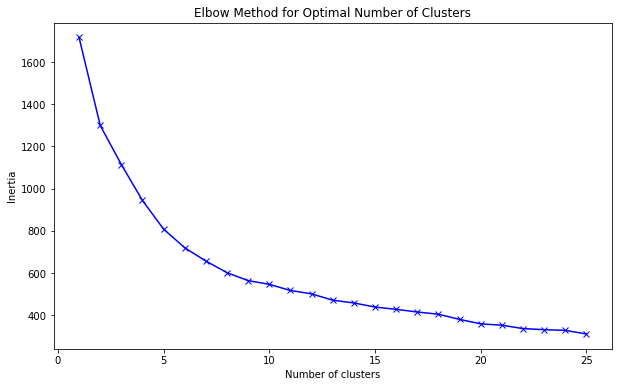

In [84]:
# Plot the inertia as a function of the number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()


### Clustering using kmeans

We are using k-means because it is computationally efficient and can scale well to large datasets. It is also relatively easy to interpret the results of k-means.

In [85]:
# Perform clustering
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
genre_features['cluster'] = kmeans.fit_predict(scaled_features)


### Merging the clusters with the original dataset
Making umbrella clusters for similar genres clustered together by mean of the features. After clustering, we have merged the clusters to the original dataset so that we can work on it for the classification modelling. 

In [86]:
df_merged = pd.merge(df, genre_features[['cluster']], left_on='genre', right_index=True)

# display the resulting merged dataframe
df_merged

danceability  energy   key  loudness  mode  speechiness  acousticness  \
0              0.829   0.435   0.0   -10.136   1.0       0.0515        0.0363   
1              0.956   0.377   6.0    -7.965   1.0       0.0804        0.5660   
2              0.764   0.567   6.0    -7.493   1.0       0.0577        0.2410   
3              0.833   0.362  10.0    -7.856   0.0       0.0524        0.8510   
4              0.927   0.631   3.0    -5.245   1.0       0.0470        0.0706   
...              ...     ...   ...       ...   ...          ...           ...   
548754         0.678   0.971   4.0    -2.515   1.0       0.0827        0.7450   
548755         0.523   0.770   5.0    -1.471   1.0       0.0335        0.5140   
548756         0.484   0.965  11.0    -1.006   1.0       0.2170        0.6250   
548757         0.730   0.932  11.0    -1.650   1.0       0.0633        0.8050   
548758         0.689   0.970   1.0    -0.680   0.0       0.0705        0.4930   

        instrumentalness  liveness  valence    tempo  duration_ms  \
0               0.881000    0.1190    0.594  103.817     230147.0   
1               0.414000    0.3130    0.566  119.993     268333.0   
2               0.369000    0.3240    0.412  122.513     277987.0   
3               0.551000    0.1050    0.598   79.987     246720.0   
4               0.005360    0.1070    0.935  123.316     215867.0   
...                  ...       ...      ...      ...          ...   
548754          0.000232    0.0820    0.898   94.955     417413.0   
548755          0.000000    0.0977    0.517  108.128     248240.0   
548756          0.000000    0.0992    0.858  114.098     332853.0   
548757          0.000117    0.1070    0.774  140.025     361920.0   
548758          0.000002    0.0454    0.942  157.350     376293.0   

        time_signature               artist_name                    song_name  \
0                  4.0  Unknown Mortal Orchestra  So Good At Being in Trouble   
1                  4.0  Unknown Mortal Orchestra                     Hunnybee   
2                  4.0  Unknown Mortal Orchestra                    Meshuggah   
3                  4.0  Unknown Mortal Orchestra                        Nadja   
4                  4.0  Unknown Mortal Orchestra                    That Life   
...                ...                       ...                          ...   
548754             4.0              Esther Akawa                   Oza monene   
548755             4.0              Esther Akawa                     Elshadai   
548756             4.0              Esther Akawa                      Musungi   
548757             4.0              Esther Akawa                      Lendisa   
548758             3.0              Esther Akawa            Secret de royaume   

            genre        spotify_track_id  cluster  
0       Chillwave  2lwi35A2ym3FAmSlvOGnQp        8  
1       Chillwave  6AAYNz8jXvVlgG9IpYi42Z        8  
2       Chillwave  7FpD6W73sZuEEp4dNRCwy9        8  
3       Chillwave  2AojQfi1k8pgwyg1Ii0Ly8        8  
4       Chillwave  0M2hckQzSt0AZFytuTC2Hp        8  
...           ...                     ...      ...  
548754     Gospel  3oL4iHhujUzuH0sYCMiuCU        0  
548755     Gospel  2kKReLa3v3Yosuq9aEefMR        0  
548756     Gospel  71Eip4smlftqu4jwgfx9ps        0  
548757     Gospel  6EvomQwPbZku16wxacOARz        0  
548758     Gospel  4zCLVInpC02VWd8g4LI6iR        0  

[550295 rows x 18 columns]

### Splitting the dataset into X and y 

In [87]:
feature_columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'time_signature']
X = df_merged[feature_columns]
y = df_merged['cluster']

### Splitting the data into train and test for modelling

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Standardizing the data 

In [89]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Checking for class imbalances by looking at the frequency


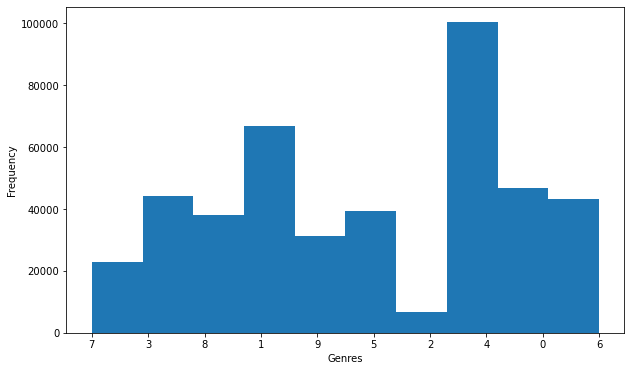

In [90]:
class_freqs = pd.Series(y_train).value_counts()

plt.figure(figsize = (10,6))
plt.hist(y_train, bins=len(class_freqs))
plt.xticks(range(len(class_freqs)), class_freqs.index)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.show()
#print(class_freqs)

There is a lot of imbalance in the data so would be using SMOTE to get more instances of the minority classes to reduce the imbalance. 

### SMOTE (Synthetic Minority Over-sampling Technique) on training data

In [91]:
X_train_smote, y_train_smote = SMOTE().fit_resample(X_train, y_train)

## Preliminary Modelling
To test the viability of the data we will be doing some preliminary modelling using: 
* Logistic Regression
* Gaussian Naive Bayes 
* Random Forest Classifier
* Knn 

### Logistic Regression

In [92]:
lr_hf = LogisticRegression(max_iter=1000)
lr_hf.fit(X_train_smote, y_train_smote)
lr_pred = lr_hf.predict(X_test)


In [93]:
accuracy_lr = accuracy_score(y_test, lr_pred)

In [94]:
print(classification_report(y_test, lr_pred, digits=3))

              precision    recall  f1-score   support

           0      0.185     0.405     0.254      5743
           1      0.414     0.266     0.324     10994
           2      0.345     0.374     0.359      9541
           3      0.457     0.427     0.442     16883
           4      0.565     0.704     0.627      7729
           5      0.368     0.569     0.447      9783
           6      0.503     0.746     0.601      1616
           7      0.568     0.224     0.321     25105
           8      0.462     0.466     0.464     11801
           9      0.487     0.689     0.571     10864

    accuracy                          0.426    110059
   macro avg      0.435     0.487     0.441    110059
weighted avg      0.458     0.426     0.416    110059



Accuracy is 42.6%. Which is okayish in this case. We will be running more models to test the accuracy. 

### Gaussian Naive Bayes

In [95]:
gnb_hf = GaussianNB()
gnb_hf.fit(X_train_smote, y_train_smote)
gnb_pred = gnb_hf.predict(X_test)


In [96]:
accuracy_gnb = accuracy_score(y_test, gnb_pred)

In [97]:
print(classification_report(y_test, gnb_pred, digits=3))

              precision    recall  f1-score   support

           0      0.166     0.310     0.216      5743
           1      0.436     0.146     0.218     10994
           2      0.326     0.266     0.293      9541
           3      0.365     0.445     0.401     16883
           4      0.481     0.749     0.586      7729
           5      0.356     0.505     0.418      9783
           6      0.364     0.748     0.490      1616
           7      0.529     0.188     0.278     25105
           8      0.422     0.418     0.420     11801
           9      0.450     0.721     0.554     10864

    accuracy                          0.389    110059
   macro avg      0.389     0.449     0.387    110059
weighted avg      0.417     0.389     0.368    110059



Accuracy is 38.9%. 

### Random Forest Classifier

In [98]:
rfc = RandomForestClassifier(random_state=1,  n_estimators = 100)
rfc.fit(X_train_smote, y_train_smote)
rfc_pred = rfc.predict(X_test)


In [99]:
accuracy_rfc = accuracy_score(y_test, rfc_pred)

In [100]:
print(classification_report(y_test, rfc_pred, digits=3))

              precision    recall  f1-score   support

           0      0.284     0.410     0.335      5743
           1      0.431     0.386     0.407     10994
           2      0.398     0.415     0.407      9541
           3      0.513     0.451     0.480     16883
           4      0.615     0.743     0.673      7729
           5      0.448     0.557     0.497      9783
           6      0.728     0.767     0.747      1616
           7      0.560     0.447     0.497     25105
           8      0.559     0.547     0.553     11801
           9      0.599     0.683     0.638     10864

    accuracy                          0.506    110059
   macro avg      0.514     0.541     0.523    110059
weighted avg      0.512     0.506     0.505    110059



Accuracy is 50.6%.

### K-nearest neighbour Classifier

In [101]:
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train_smote, y_train_smote)
knn_pred = knn.predict(X_test)


In [102]:
accuracy_knn = accuracy_score(y_test, knn_pred)

In [103]:
print(classification_report(y_test, knn_pred, digits=3))

              precision    recall  f1-score   support

           0      0.167     0.427     0.240      5743
           1      0.314     0.319     0.316     10994
           2      0.271     0.350     0.306      9541
           3      0.444     0.336     0.383     16883
           4      0.524     0.655     0.582      7729
           5      0.370     0.506     0.427      9783
           6      0.360     0.751     0.487      1616
           7      0.558     0.206     0.301     25105
           8      0.464     0.423     0.443     11801
           9      0.508     0.590     0.546     10864

    accuracy                          0.389    110059
   macro avg      0.398     0.456     0.403    110059
weighted avg      0.434     0.389     0.385    110059



Accuracy 38.9%.

### Plotting the accuracies

In [104]:
classifiers = ['Gaussian Naive Bayes', 'KNN', 'Logistic Regression', 'Random Forest']
accuracies = [accuracy_gnb, accuracy_knn, accuracy_lr, accuracy_rfc]


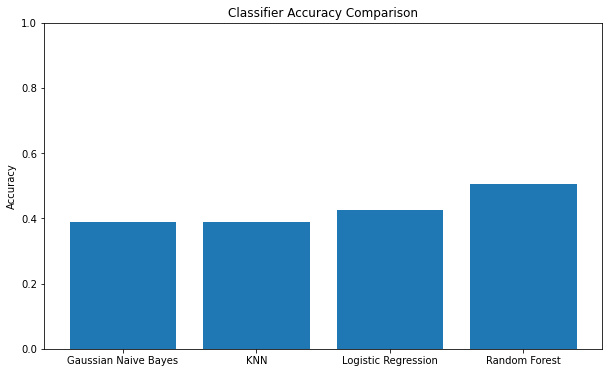

In [106]:
plt.figure(figsize = (10,6))
plt.bar(classifiers, accuracies)
plt.ylim([0.0, 1.0])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()


Highest accuracy is of Random Forest, which is 50.6%. 

## References

* Class notes, lectures and labs